In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [2]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
print(train_df['ExterCond'].values)

['TA' 'TA' 'TA' ... 'Gd' 'TA' 'TA']


Text(0, 0.5, 'Number of houses')

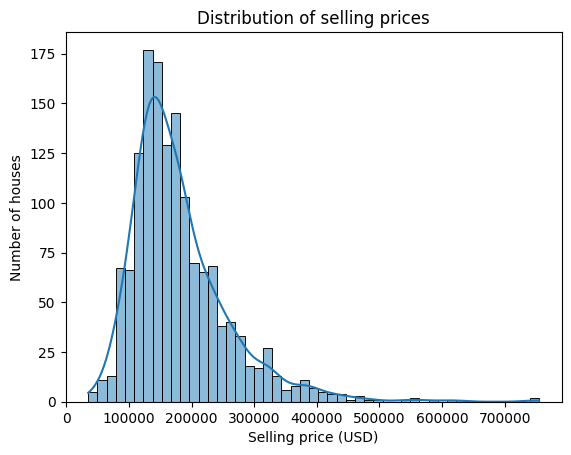

In [5]:
sns.histplot(train_df['SalePrice'], kde=True)
plt.title("Distribution of selling prices")
plt.xlabel("Selling price (USD)")
plt.ylabel("Number of houses")

Text(0, 0.5, 'Цена')

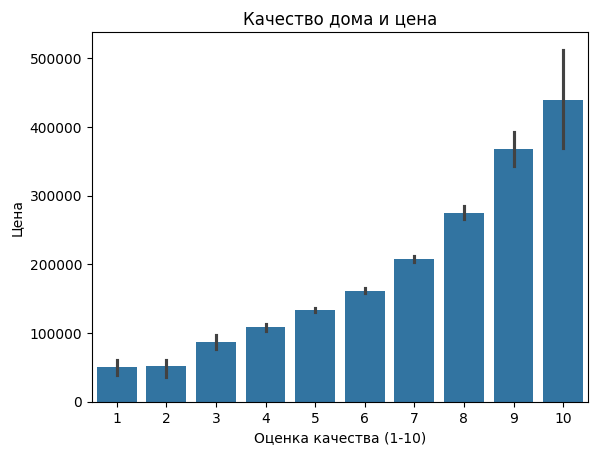

In [6]:
sns.barplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title("Качество дома и цена")
plt.xlabel("Оценка качества (1-10)")
plt.ylabel("Цена")

Text(0, 0.5, 'Цена')

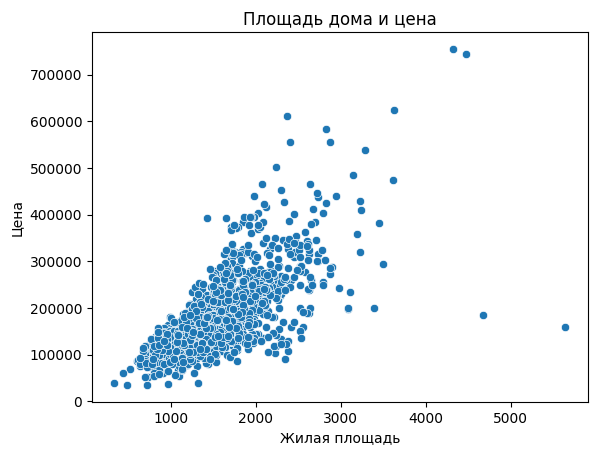

In [7]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)
plt.title("Площадь дома и цена")
plt.xlabel("Жилая площадь")
plt.ylabel("Цена")

Text(0, 0.5, 'Средняя цена (USD)')

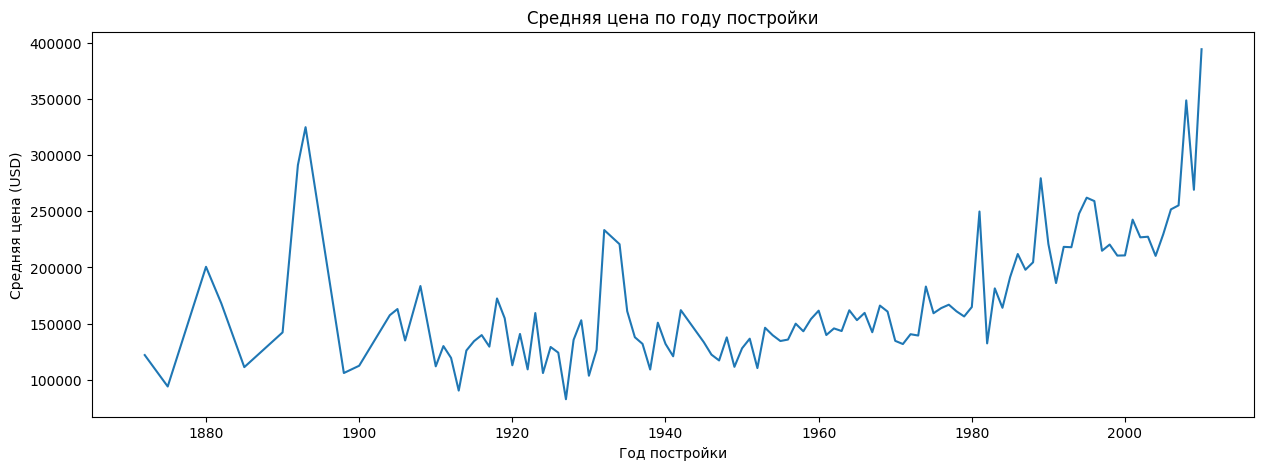

In [8]:
year_price = train_df.groupby('YearBuilt')['SalePrice'].mean()
year_price.plot(figsize=(15,5))
plt.title("Средняя цена по году постройки")
plt.xlabel("Год постройки")
plt.ylabel("Средняя цена (USD)")

In [9]:
train_df['HasPool'] = (train_df['PoolArea'] > 0).astype(int)

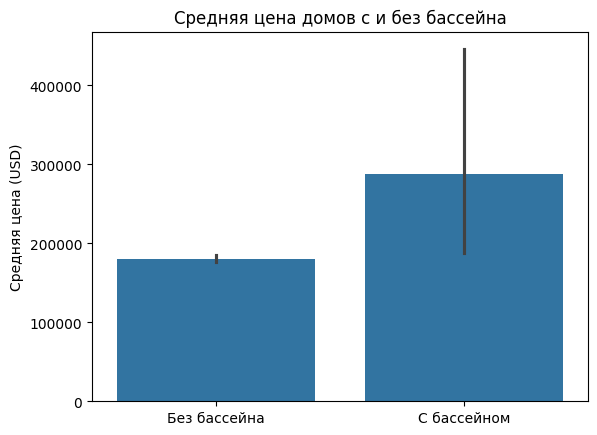

In [10]:
sns.barplot(x='HasPool', y='SalePrice', data=train_df)
plt.xticks([0, 1], ['Без бассейна', 'С бассейном'])
plt.title("Средняя цена домов с и без бассейна")
plt.xlabel("")
plt.ylabel("Средняя цена (USD)")
plt.show()

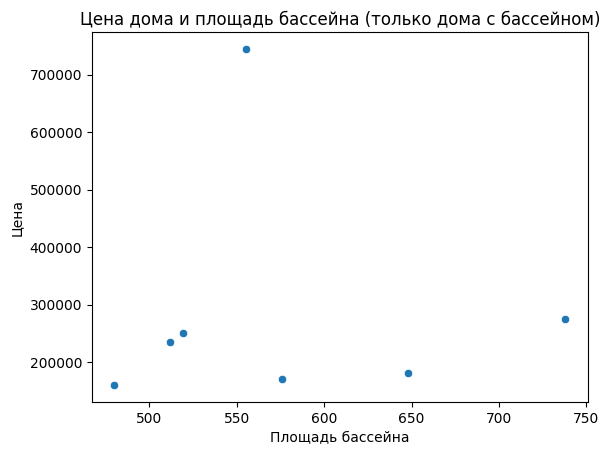

In [11]:
pool_df = train_df[train_df['PoolArea'] > 0] 
sns.scatterplot(x='PoolArea', y='SalePrice', data=pool_df)
plt.title("Цена дома и площадь бассейна (только дома с бассейном)")
plt.xlabel("Площадь бассейна")
plt.ylabel("Цена")
plt.show()

C:\Users\a\AppData\Local\Temp\ipykernel_11708\2079219191.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neigh_price.values, y=neigh_price.index, palette="coolwarm")


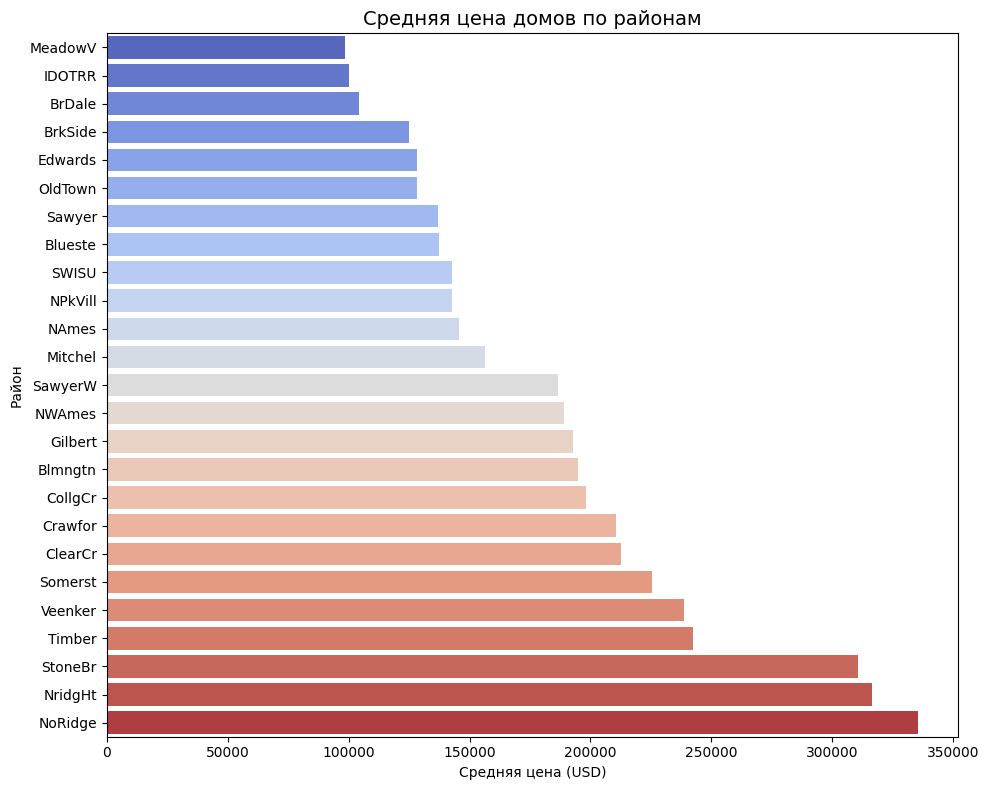

In [12]:
neigh_price = train_df.groupby('Neighborhood')['SalePrice'].mean().sort_values()

plt.figure(figsize=(10, 8))
sns.barplot(x=neigh_price.values, y=neigh_price.index, palette="coolwarm")
plt.title("Средняя цена домов по районам", fontsize=14)
plt.xlabel("Средняя цена (USD)")
plt.ylabel("Район")
plt.tight_layout()
plt.show()

In [13]:
train_df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageYrBlt       81
GarageFinish      81
GarageType        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtFinType1      37
BsmtCond          37
MasVnrArea         8
Electrical         1
HouseStyle         0
dtype: int64

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [15]:
na_none = [
    'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PoolQC', 'Fence', 'MiscFeature'
]
for col in na_none:
    train_df[col] = train_df[col].fillna("None")

na_zero = [
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea',
    'MasVnrArea', 'PoolArea'
]
for col in na_zero:
    train_df[col] = train_df[col].fillna(0)

train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

for col in train_df.select_dtypes(include='object'):
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

train_df['MSSubClass'] = train_df['MSSubClass'].astype(str)
train_df['OverallCond'] = train_df['OverallCond'].astype(str)
train_df['YrSold'] = train_df['YrSold'].astype(str)
train_df['MoSold'] = train_df['MoSold'].astype(str)


train_df["TotalSF"] = train_df["TotalBsmtSF"] + train_df["1stFlrSF"] + train_df["2ndFlrSF"]
train_df["TotalBath"] = (train_df["FullBath"] + 0.5 * train_df["HalfBath"] +
                         train_df["BsmtFullBath"] + 0.5 * train_df["BsmtHalfBath"])
train_df["OverallQual_GrLivArea"] = train_df["OverallQual"] * train_df["GrLivArea"]

cat_cols = train_df.select_dtypes(include='object').columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded = encoder.fit_transform(train_df[cat_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols), index=train_df.index)
train_df = pd.concat([train_df.drop(columns=cat_cols), encoded_df], axis=1)


✅ Осталось пропусков: 0
🔥 Гребневая (Ridge) регрессия
Лучшее alpha: 568.9866
R²: 0.921
MAE: 15,762 $
RMSE: 24,584 $


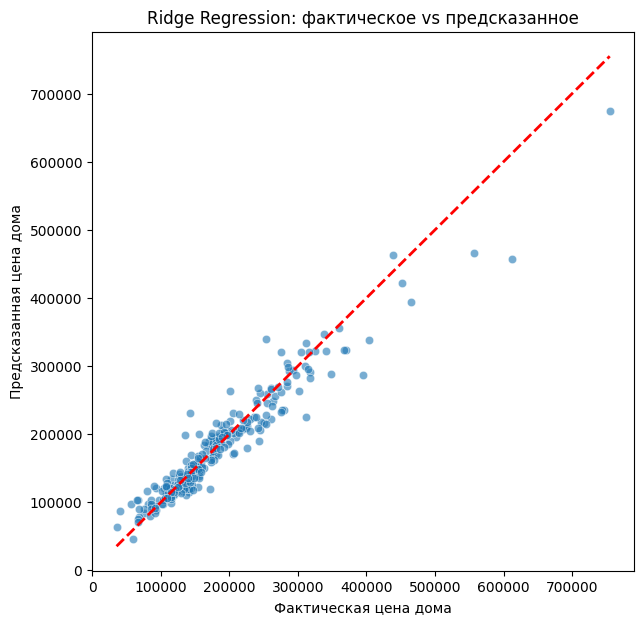

In [16]:
y = np.log1p(train_df["SalePrice"])  # логарифм для стабилизации разброса
X = train_df.drop("SalePrice", axis=1)

# === 2️⃣ Заполняем пропуски ===
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].fillna('Unknown')
    else:
        X[col] = X[col].fillna(X[col].median())

print("✅ Осталось пропусков:", X.isna().sum().sum())

# === 3️⃣ Target Encoding для категориальных признаков ===
categorical_cols = X.select_dtypes(include='object').columns

for col in categorical_cols:
    mapping = train_df.groupby(col)["SalePrice"].mean().to_dict()
    X[col] = X[col].map(mapping)

# Иногда могут появиться NaN — заполним снова медианой
X = X.fillna(X.median(numeric_only=True))

# === 4️⃣ Масштабирование данных ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 5️⃣ Разделение на обучающую и тестовую выборки ===
X_train, X_valid, y_train, y_valid = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# === 6️⃣ Модель RidgeCV с подбором alpha через кросс-валидацию ===
alphas = np.logspace(-3, 3, 50)
ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train, y_train)

# === 7️⃣ Предсказания ===
y_pred_log = ridge.predict(X_valid)
y_pred = np.expm1(y_pred_log)
y_valid_exp = np.expm1(y_valid)

# === 8️⃣ Метрики качества ===
mae = mean_absolute_error(y_valid_exp, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid_exp, y_pred))
r2 = r2_score(y_valid_exp, y_pred)

print("🔥 Гребневая (Ridge) регрессия")
print(f"Лучшее alpha: {ridge.alpha_:.4f}")
print(f"R²: {r2:.3f}")
print(f"MAE: {mae:,.0f} $")
print(f"RMSE: {rmse:,.0f} $")

# === 9️⃣ Визуализация предсказаний ===
plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_valid_exp, y=y_pred, alpha=0.6)
plt.plot([y_valid_exp.min(), y_valid_exp.max()],
         [y_valid_exp.min(), y_valid_exp.max()],
         color='red', linestyle='--', lw=2)
plt.xlabel("Фактическая цена дома")
plt.ylabel("Предсказанная цена дома")
plt.title("Ridge Regression: фактическое vs предсказанное")
plt.show()

✅ Осталось пропусков: 0
Размер матрицы после полиномиального расширения: (1460, 59339)
🔥 Полиномиальная Ridge Regression
Лучшее alpha: 1000.0000
R²: 0.924
MAE: 15,411 $
RMSE: 24,089 $


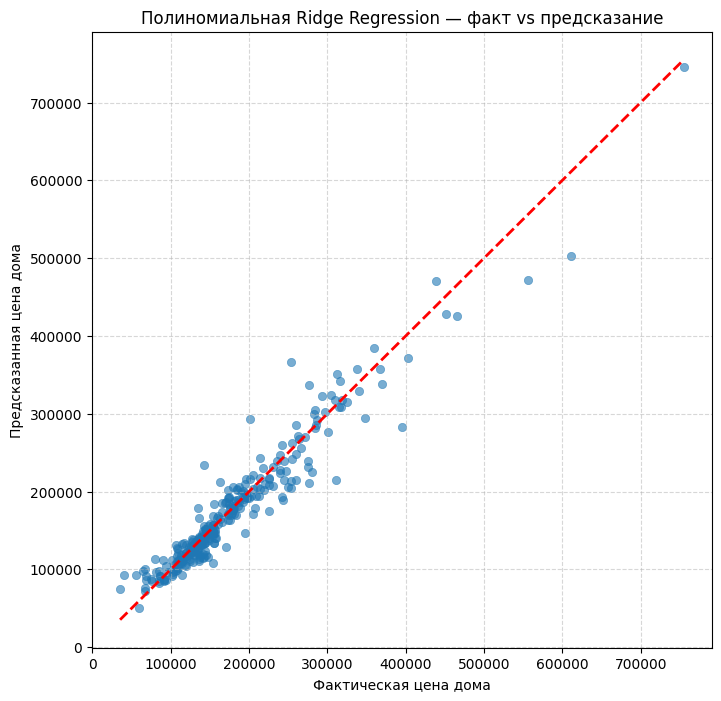

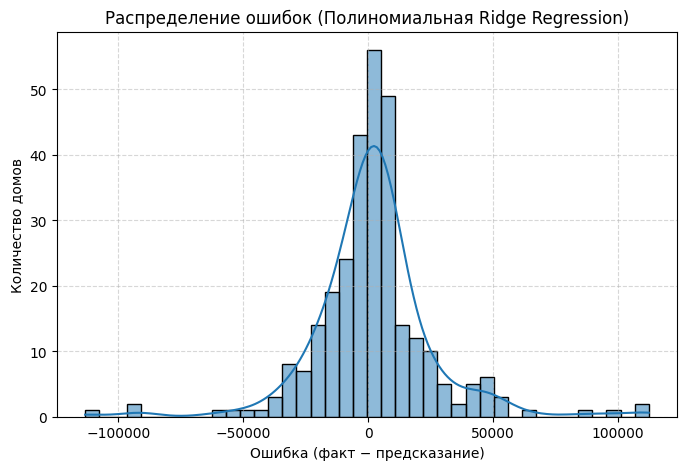

In [17]:
y = np.log1p(train_df["SalePrice"])  # логарифм для стабильности
X = train_df.drop("SalePrice", axis=1)

# === 2️⃣ Заполнение пропусков ===
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].fillna('Unknown')
    else:
        X[col] = X[col].fillna(X[col].median())

print("✅ Осталось пропусков:", X.isna().sum().sum())

# === 3️⃣ Target Encoding для категориальных признаков ===
categorical_cols = X.select_dtypes(include='object').columns
for col in categorical_cols:
    mapping = train_df.groupby(col)["SalePrice"].mean().to_dict()
    X[col] = X[col].map(mapping)

# Повторная очистка после энкодинга
X = X.fillna(X.median(numeric_only=True))

# === 4️⃣ Генерация полиномиальных признаков ===
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
print("Размер матрицы после полиномиального расширения:", X_poly.shape)

# === 5️⃣ Масштабирование ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# === 6️⃣ Разделение на train/valid ===
X_train, X_valid, y_train, y_valid = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# === 7️⃣ Модель RidgeCV ===
alphas = np.logspace(-3, 3, 50)
ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train, y_train)

# === 8️⃣ Предсказания ===
y_pred_log = ridge.predict(X_valid)
y_pred = np.expm1(y_pred_log)
y_valid_exp = np.expm1(y_valid)

# === 9️⃣ Метрики ===
mae = mean_absolute_error(y_valid_exp, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid_exp, y_pred))
r2 = r2_score(y_valid_exp, y_pred)

print("🔥 Полиномиальная Ridge Regression")
print(f"Лучшее alpha: {ridge.alpha_:.4f}")
print(f"R²: {r2:.3f}")
print(f"MAE: {mae:,.0f} $")
print(f"RMSE: {rmse:,.0f} $")

# === 🔟 Графики ===

# Сравнение фактических и предсказанных значений
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_valid_exp, y=y_pred, alpha=0.6, edgecolor=None)
plt.plot([y_valid_exp.min(), y_valid_exp.max()],
         [y_valid_exp.min(), y_valid_exp.max()],
         color='red', linestyle='--', lw=2)
plt.xlabel("Фактическая цена дома")
plt.ylabel("Предсказанная цена дома")
plt.title("Полиномиальная Ridge Regression — факт vs предсказание")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Распределение ошибок
errors = y_valid_exp - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(errors, bins=40, kde=True)
plt.title("Распределение ошибок (Полиномиальная Ridge Regression)")
plt.xlabel("Ошибка (факт − предсказание)")
plt.ylabel("Количество домов")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


C:\Users\a\AppData\Local\Temp\ipykernel_11708\1425310681.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")


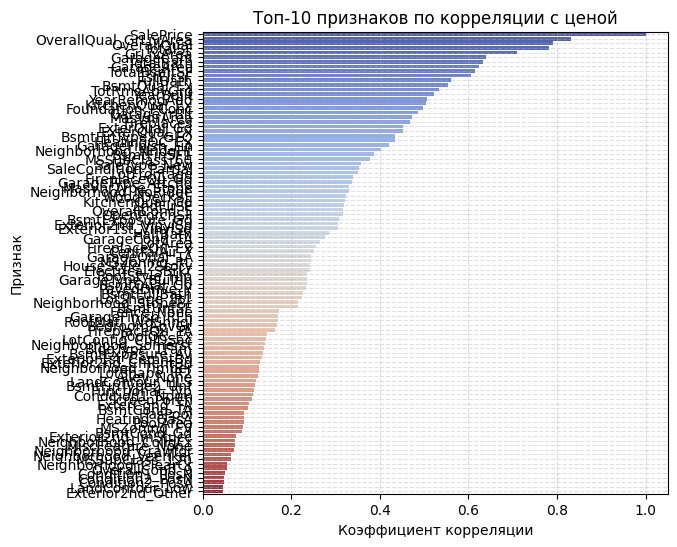

In [21]:
corr_all = train_df.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)
top_corr = corr_all.head(100) 

plt.figure(figsize=(6, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")
plt.title("Топ-10 признаков по корреляции с ценой")
plt.xlabel("Коэффициент корреляции")
plt.ylabel("Признак")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

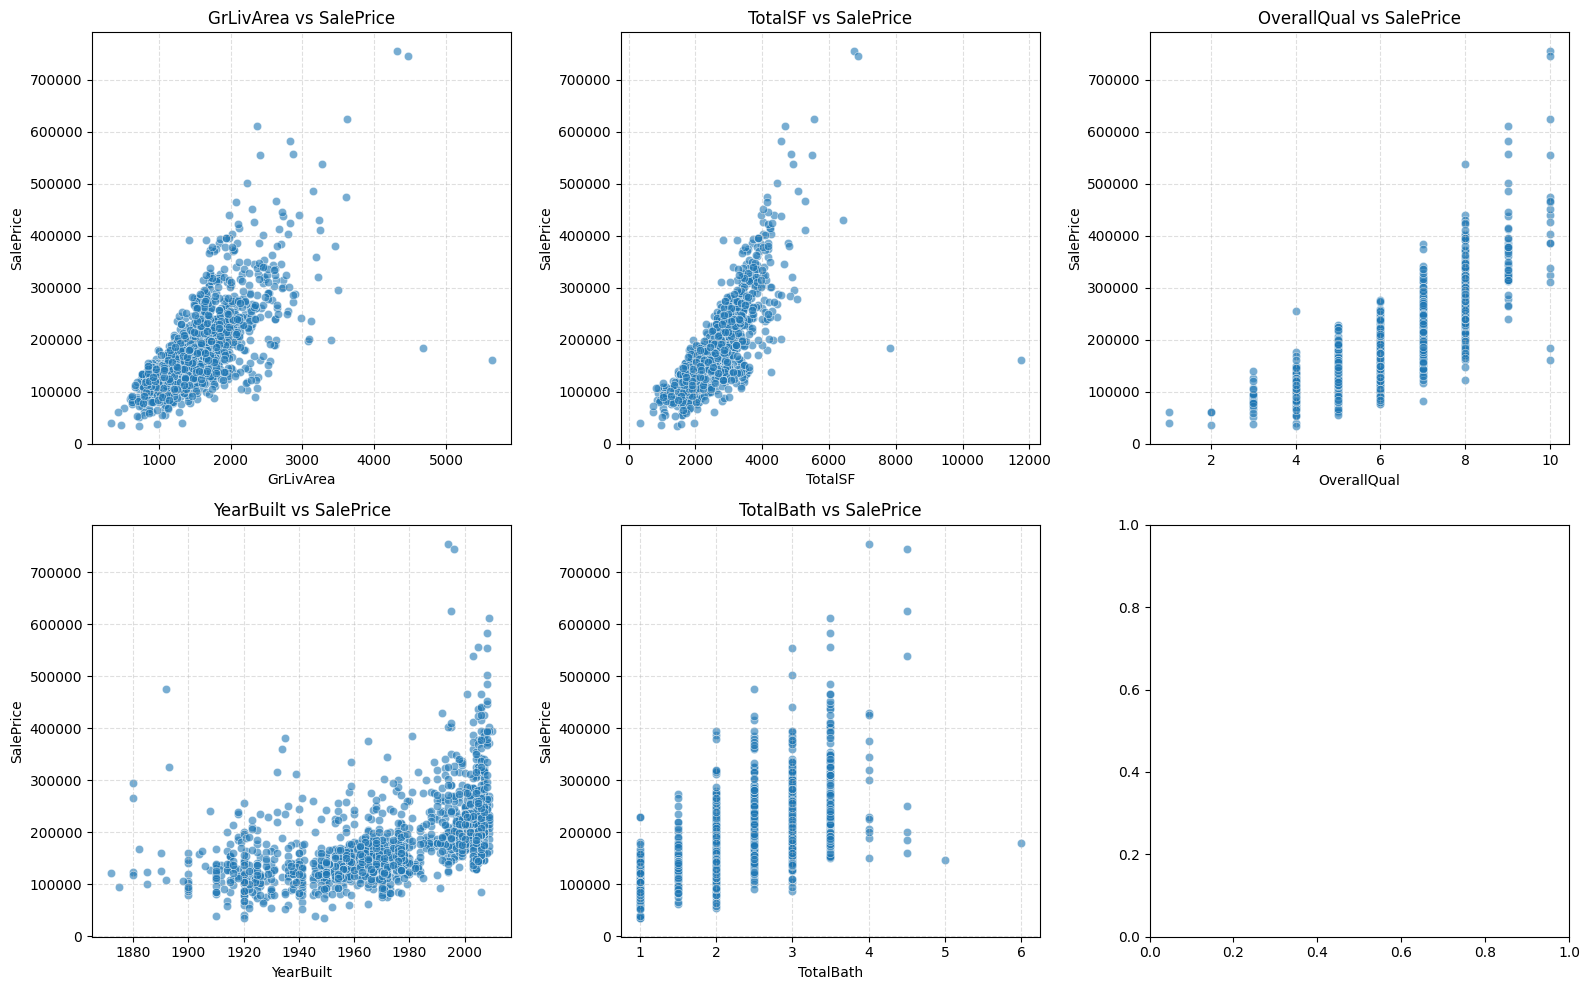

In [19]:
important_features = ["GrLivArea", "TotalSF", "OverallQual", "YearBuilt", "TotalBath"]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(important_features):
    sns.scatterplot(data=train_df, x=col, y="SalePrice", alpha=0.6, ax=axes[i])
    axes[i].set_title(f"{col} vs SalePrice")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("SalePrice")
    axes[i].grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()

C:\Users\a\AppData\Local\Temp\ipykernel_11708\3570030742.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\a\AppData\Local\Temp\ipykernel_11708\3570030742.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\a\AppData\Local\Temp\ipykernel_11708\3570030742.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


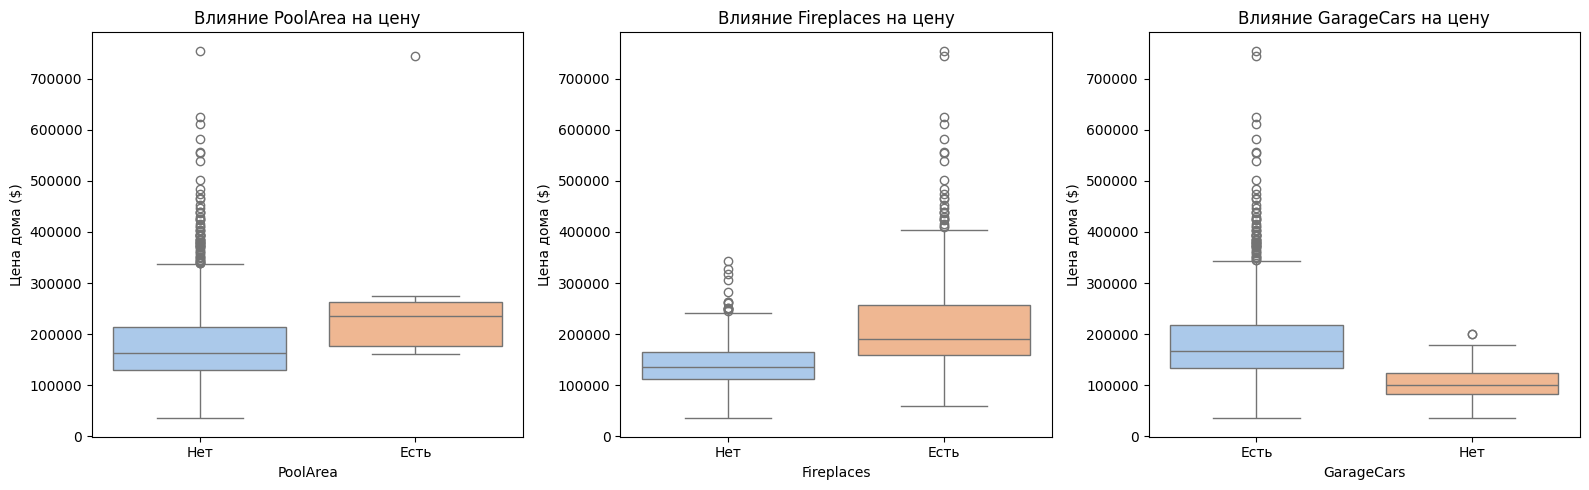

In [20]:
binary_features = ["PoolArea", "Fireplaces", "GarageCars"]

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
for i, col in enumerate(binary_features):
    sns.boxplot(
        data=train_df,
        x=(train_df[col] > 0).map({True: "Есть", False: "Нет"}),
        y="SalePrice",
        ax=axes[i],
        palette="pastel"
    )
    axes[i].set_title(f"Влияние {col} на цену")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Цена дома ($)")
plt.tight_layout()
plt.show()